In [20]:
import pandas as pd
import numpy as np
from faker import Faker
from datetime import datetime, timedelta

In [21]:
fake = Faker()
start_date = datetime(2024, 5, 1)
num_days = 15
num_users = 3000
transactions_per_user = 5  # 사기 사용자의 최대 거래 횟수

# 사용자 정보 초기화
users = pd.DataFrame({
    'user_id': range(num_users),
    'ip': [fake.ipv4() for _ in range(num_users)],
    'device_id': [fake.uuid4() for _ in range(num_users)],
    'phone_number': [fake.phone_number() for _ in range(num_users)],
    'credit_card': [fake.credit_card_number() for _ in range(num_users)],
})

# 사기 그룹 설정
fraud_group_size = 30
ip_fraud_users = set(np.random.choice(num_users, fraud_group_size, replace=False))
card_fraud_users = set(np.random.choice(num_users, fraud_group_size, replace=False))
device_phone_fraud_users = set(np.random.choice(num_users, fraud_group_size, replace=False))

# Define shared fraud attributes
shared_ips = [fake.ipv4() for _ in range(10)]
shared_cards = [fake.credit_card_number() for _ in range(10)]
shared_devices = [fake.uuid4() for _ in range(10)]
shared_phones = [fake.phone_number() for _ in range(10)]

# 거래 데이터 생성
transactions = []
for user_id in range(num_users):
    num_transactions = np.random.randint(1, transactions_per_user + 1) if user_id in ip_fraud_users or user_id in card_fraud_users or user_id in device_phone_fraud_users else 5
    for _ in range(num_transactions):
        day = np.random.choice(num_days)
        date = start_date + timedelta(days=day)
        ip = shared_ips[np.random.randint(len(shared_ips))] if user_id in ip_fraud_users else users.at[user_id, 'ip']
        card = shared_cards[np.random.randint(len(shared_cards))] if user_id in card_fraud_users else users.at[user_id, 'credit_card']
        device = shared_devices[np.random.randint(len(shared_devices))] if user_id in device_phone_fraud_users else users.at[user_id, 'device_id']
        phone = shared_phones[np.random.randint(len(shared_phones))] if user_id in device_phone_fraud_users else users.at[user_id, 'phone_number']
        is_fraud = user_id in ip_fraud_users or user_id in card_fraud_users or user_id in device_phone_fraud_users
        transactions.append({
            'transaction_id': fake.uuid4(),
            'user_id': user_id,
            'transaction_time': date,
            'ip': ip,
            'device_id': device,
            'phone_number': phone,
            'credit_card_number': card,
            'order_item': np.random.choice(['스마트폰', '노트북', '식품', '문구', '악세서리','가전제품', '의류', '화장품', '아동용품', '여행용품']),
            'amount': np.random.randint(1000, 300000),
            'is_fraud': is_fraud
        })

transactions_df = pd.DataFrame(transactions)

In [22]:
transactions_df.shape

(14839, 10)

In [23]:
transactions_df[transactions_df['is_fraud']==1]

,transaction_id,user_id,transaction_time,ip,device_id,phone_number,credit_card_number,order_item,amount,is_fraud
160,bb2b71ff-5ced-4226-bbb0-8b8a5121d423,32,2024-05-11,68.233.53.138,5a15f8b0-ca82-41ab-b841-6ef2009372b7,+1-294-268-4264,4848420154469850,식품,206063,True
161,27cd7bf8-ccd5-4076-b080-4c414f3232d2,32,2024-05-04,33.248.157.206,5a15f8b0-ca82-41ab-b841-6ef2009372b7,+1-294-268-4264,4848420154469850,식품,231577,True
162,fc4b6208-f83f-4c63-b379-155434faea89,32,2024-05-07,110.143.89.228,5a15f8b0-ca82-41ab-b841-6ef2009372b7,+1-294-268-4264,4848420154469850,화장품,39287,True
678,602c7d1f-8be1-416f-abd7-b652855b4b82,136,2024-05-09,12.182.160.104,14c6880f-c210-4882-bc9c-be36aae8c58b,(564)574-8956,5411811551639489,아동용품,220553,True
884,32898b4b-0124-4073-84d5-c63778680111,178,2024-05-15,45.77.246.79,2df93562-e136-4689-ace6-1187920fe1b9,334-514-5716,4439362091148,아동용품,166885,True
...,...,...,...,...,...,...,...,...,...,...
14249,030cb65a-a288-448a-aad6-274cf90f44fa,2881,2024-05-01,51.14.151.121,2f217c32-2c4d-4543-a11c-8a818385927f,001-503-576-1443x79148,2700003321689872,노트북,257108,True
14670,05f2bf32-40e0-4e65-b209-74f951b3561f,2966,2024-05-09,203.27.162.197,9946f447-dc37-49e4-b6b9-d9b62f4f2387,(773)220-8286,4345977338798221,문구,89006,True
14671,6356ba89-223d-4cb3-94f9-68492b0b9d9e,2966,2024-05-04,68.233.53.138,9946f447-dc37-49e4-b6b9-d9b62f4f2387,(773)220-8286,4345977338798221,아동용품,178337,True
14672,e1f6d549-4911-4730-8e97-388c0d5e6388,2966,2024-05-04,121.240.71.221,9946f447-dc37-49e4-b6b9-d9b62f4f2387,(773)220-8286,4345977338798221,문구,218118,True


In [24]:
import networkx as nx
import pandas as pd
from community import community_louvain

# Convert the dataframe to a suitable format for graph creation
def build_graph(data):
    G = nx.Graph()
    for _, row in data.iterrows():
        G.add_edge(row['user_id'], row['ip'], weight=1)
        G.add_edge(row['user_id'], row['device_id'], weight=1)
        G.add_edge(row['user_id'], row['credit_card_number'], weight=1)
        G.add_edge(row['user_id'], row['phone_number'], weight=1)
        
        # Set attributes for nodes
        G.nodes[row['user_id']]['node_type'] = 'user_id'
        G.nodes[row['ip']]['node_type'] = 'ip'
        G.nodes[row['device_id']]['node_type'] = 'device_id'
        G.nodes[row['credit_card_number']]['node_type'] = 'credit_card'
        G.nodes[row['phone_number']]['node_type'] = 'phone_number'
    return G

G = build_graph(transactions_df)

In [25]:
partition = community_louvain.best_partition(G)
for node, comm_id in partition.items():
    G.nodes[node]['community'] = comm_id

# Gathering all nodes by community
from itertools import groupby

all_communities = [list(group) for key, group in groupby(sorted(partition, key=partition.get), key=partition.get)]

In [26]:
from concurrent.futures import ThreadPoolExecutor, as_completed

In [27]:
def analyze_community(G, nodes):
    subgraph = G.subgraph(nodes)
    comm_density = nx.density(subgraph)
    modularity_score = community_louvain.modularity(partition, G)
    user_count = sum(1 for node in nodes if G.nodes[node]['node_type'] == 'user_id')
    phone_count = sum(1 for node in nodes if G.nodes[node]['node_type'] == 'phone_number')
    card_count = sum(1 for node in nodes if G.nodes[node]['node_type'] == 'credit_card')
    return [comm_density, modularity_score, len(nodes), user_count, phone_count, card_count]

def analyze_communities_parallel(G, all_communities):
    community_info = []
    with ThreadPoolExecutor() as executor:
        futures = {executor.submit(analyze_community, G, nodes): comm_id for comm_id, nodes in enumerate(all_communities)}
        for future in as_completed(futures):
            comm_id = futures[future]
            result = future.result()
            community_info.append([comm_id] + result)
    return pd.DataFrame(community_info, columns=['Community ID', 'Density', 'Modularity', 'Size', 'User Count', 'Phone Count', 'Card Count'])

df_community = analyze_communities_parallel(G, all_communities)

In [28]:
df_community

,Community ID,Density,Modularity,Size,User Count,Phone Count,Card Count
0,4,0.4,0.998323,5,1,1,1
1,2,0.4,0.998323,5,1,1,1
2,17,0.4,0.998323,5,1,1,1
3,10,0.4,0.998323,5,1,1,1
4,6,0.4,0.998323,5,1,1,1
...,...,...,...,...,...,...,...
2910,2912,0.4,0.998323,5,1,1,1
2911,2910,0.4,0.998323,5,1,1,1
2912,2911,0.4,0.998323,5,1,1,1
2913,2913,0.4,0.998323,5,1,1,1


/Users/kook/myenv/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


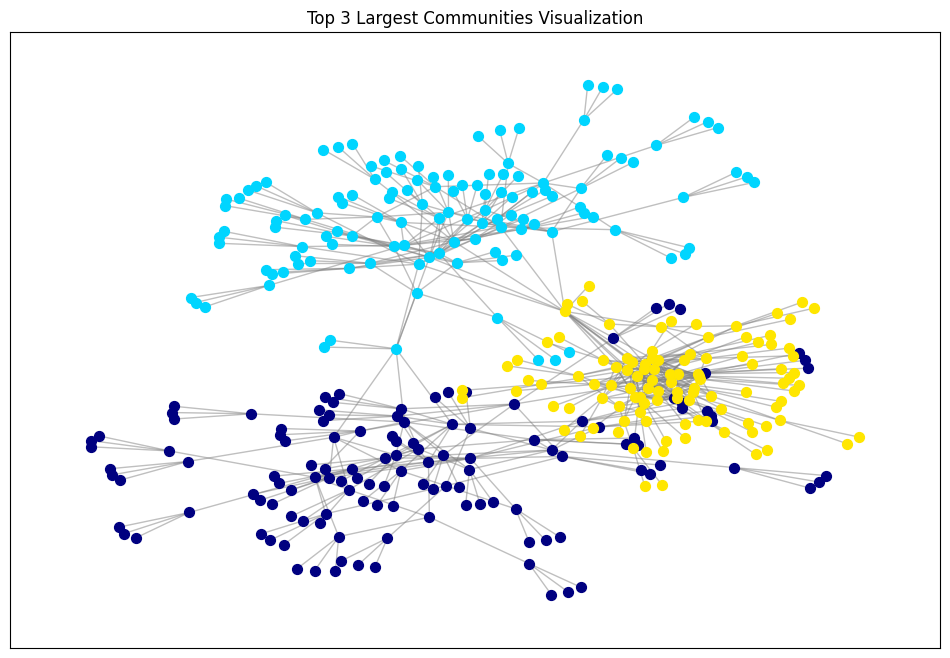

In [29]:
import matplotlib.pyplot as plt

# 가장 큰 세 개의 커뮤니티 선택
top_communities = sorted(all_communities, key=len, reverse=True) [: 3]
filtered_nodes = [node for comm in top_communities for node in comm]
G_top = G. subgraph(filtered_nodes)

# 시각화
plt. figure(figsize=(12, 8))
pos = nx.spring_layout(G_top)# 노드 위치를 계산

for comm_id, nodes in enumerate(top_communities) :
    nx.draw_networkx_nodes(G_top, pos, nodelist=nodes, node_size=50,node_color=plt. cm.jet(comm_id / len(top_communities)))

nx. draw_networkx_edges(G_top, pos, alpha=0.5, edge_color='gray')
plt.title("Top 3 Largest Communities Visualization")
plt. show()

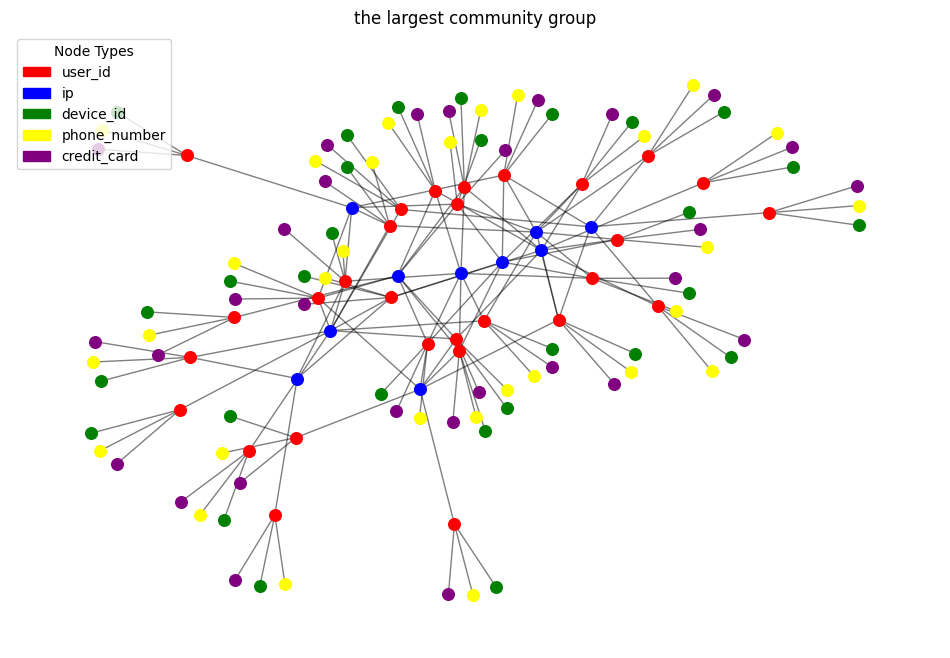

In [37]:
import matplotlib.patches as mpatches


# 가장 큰 커뮤니티 추출
largest_community = max(all_communities, key=len)
G_largest = G. subgraph(largest_community)

plt. figure(figsize=(12, 8))
pos = nx.spring_layout(G_largest) # 노드의 위치 계산

# 노드 유형별로 색상 지정
node_types = {
    'user_id': 'red',
    'ip': 'blue',
    'device_id': 'green',
    'phone_number': 'yellow',
    'credit_card': 'purple'
}

# 노드 그리기
for node_type, color in node_types.items() : 
    nx.draw_networkx_nodes(G_largest, pos, nodelist=[n for n in G_largest if G_largest.nodes[n]['node_type'] == node_type], node_color=color, node_size=70, label=node_type)

nx. draw_networkx_edges(G_largest, pos, alpha=0.5)

# 범례 추가
patches = [mpatches.Patch(color=color, label=node_type) for node_type, color in node_types.items()]

plt. legend(handles=patches, title="Node Types", loc='upper left')
plt. title("the largest community group")
plt.axis('off')
plt.show()